In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
#only keep the top 10000 most frequently occurring words
#train_data test_data are list of reviews train_labels and test_labels are lists of 0s and 1s

In [3]:
train_data

array([ [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32],
       [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 146

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index=imdb.get_word_index()#mapping words to integer index
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [7]:
reverse_word_index

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'for',
 16: 'with',
 17: 'movie',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'not',
 22: 'you',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'he',
 27: 'be',
 28: 'one',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'who',
 35: 'so',
 36: 'from',
 37: 'like',
 38: 'her',
 39: 'or',
 40: 'just',
 41: 'about',
 42: "it's",
 43: 'out',
 44: 'has',
 45: 'if',
 46: 'some',
 47: 'there',
 48: 'what',
 49: 'good',
 50: 'more',
 51: 'when',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'she',
 57: 'even',
 58: 'my',
 59: 'would',
 60: 'which',
 61: 'only',
 62: 'story',
 63: 'really',
 64: 'see',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'were',
 69: 'me',
 70: 'well',
 71: 'than',
 72: 'we',
 73: 'much',
 74: 'been',
 75: 'bad',
 76: 'get',
 77: 'will',
 78: 'do',
 79: 'also',
 80: 'into',
 81: 'people',
 82: 'other',
 8

In [8]:
decoded_review=' '.join(reverse_word_index.get(i-3,'?') for i in train_data[0])
#0,1,2 are reserved indices for "padding","start of sequences" and "unknown"

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
import numpy as np

In [11]:
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

In [12]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [13]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [14]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [15]:
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
from keras import losses

In [16]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.output_shape

In [17]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [19]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [21]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [22]:
import matplotlib.pyplot as plt

In [23]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

In [24]:
epochs=range(1,len(loss_values)+1)
loss_values

[0.50842401045163477,
 0.30042938952445986,
 0.21790880616505942,
 0.17504445463021595,
 0.14269256493250529,
 0.11499823382695516,
 0.098004446558157599,
 0.080698820026715593,
 0.066065901569525395,
 0.056086112578709921,
 0.043946021052201592,
 0.038141195470094681,
 0.02997949309448401,
 0.024697494505345821,
 0.017512385658423106,
 0.014907852066059907,
 0.015083955428004265,
 0.0075345745116472242,
 0.011959799246490002,
 0.0040932265837987265]

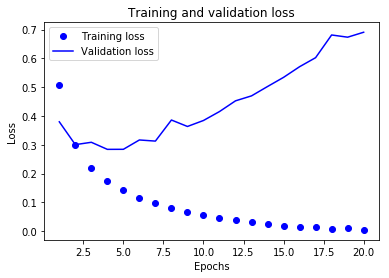

In [29]:
plt.plot(epochs,loss_values, 'bo',label='Training loss') #bo blue dot
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() ##小图例
plt.show()


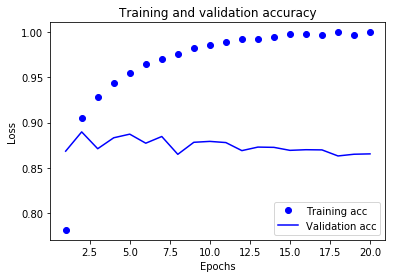

In [32]:
plt.clf() #clear figure
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
#change for 32 units

In [34]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
#excercise output
#mean_square_error loss function
#tanh activation

Epoch 1/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1679 - acc: 0.9404


In [35]:
results=model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 102us/step


In [36]:
results #loss value & metrics value(accuracy)

[0.32314988117218019, 0.87351999999999996]

In [37]:
model.predict(x_test)

array([[ 0.14028221],
       [ 0.99970287],
       [ 0.29558158],
       ..., 
       [ 0.07234909],
       [ 0.04342627],
       [ 0.4815999 ]], dtype=float32)